In [5]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
#!pip install pycountry
import pycountry

#!pip install pandas sqlalchemy pymysql
#from sqlalchemy import create_engine

import mysql.connector as db

# Collection of data from WHO URL

In [6]:
url1= "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
url2= "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
url3= "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
url4= "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

result1 = requests.get(url1)
result2 = requests.get(url2)
result3 = requests.get(url3)
result4 = requests.get(url4)

data1 = result1.json()
data2 = result2.json()
data3 = result3.json()
data4 = result4.json()

In [7]:
data1.keys()

dict_keys(['@odata.context', 'value'])

In [8]:
data2.keys()

dict_keys(['@odata.context', 'value'])

In [9]:
data3.keys()

dict_keys(['@odata.context', 'value'])

In [10]:
data4.keys()

dict_keys(['@odata.context', 'value'])

In [11]:
df1 = pd.DataFrame(data1['value'])

In [12]:
df1

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,257,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2001,SEX_BTSX,...,None,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
1,350,NCD_BMI_30C,COUNTRY,IRN,YEAR,EMR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,None,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
2,809,NCD_BMI_30C,COUNTRY,TJK,YEAR,EUR,Europe,SEX,1995,SEX_FMLE,...,None,7.9 [5.8-10.4],7.90484,5.78327,10.38715,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
3,1051,NCD_BMI_30C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2003,SEX_BTSX,...,None,46.6 [44.6-48.7],46.62329,44.61686,48.69747,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00
4,1198,NCD_BMI_30C,COUNTRY,NIU,YEAR,WPR,Western Pacific,SEX,2000,SEX_BTSX,...,None,54.6 [49.4-59.8],54.64320,49.43577,59.77076,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20785,9761579,NCD_BMI_30C,COUNTRY,LTU,YEAR,EUR,Europe,SEX,2013,SEX_BTSX,...,None,27.4 [24.0-30.9],27.39776,24.04407,30.89829,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
20786,9762260,NCD_BMI_30C,COUNTRY,ARM,YEAR,EUR,Europe,SEX,1997,SEX_BTSX,...,None,14.0 [12.1-15.9],13.95061,12.09827,15.93363,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
20787,9763597,NCD_BMI_30C,COUNTRY,ERI,YEAR,AFR,Africa,SEX,2011,SEX_MLE,...,None,1.2 [0.8-1.8],1.20233,0.76718,1.78496,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
20788,9763704,NCD_BMI_30C,COUNTRY,VCT,YEAR,AMR,Americas,SEX,2003,SEX_MLE,...,None,10.2 [7.1-14.0],10.20733,7.09326,13.98207,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00


In [13]:
df2 = pd.DataFrame(data2['value'])

In [14]:
df2

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,169,NCD_BMI_PLUS2C,COUNTRY,URY,YEAR,AMR,Americas,SEX,SEX_BTSX,2014,...,None,16.6 [14.1-19.3],16.59945,14.13963,19.26034,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00
1,542,NCD_BMI_PLUS2C,COUNTRY,AND,YEAR,EUR,Europe,SEX,SEX_MLE,1993,...,None,6.6 [1.7-15.5],6.57347,1.65166,15.45051,None,2024-02-29T16:06:41.017+01:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00
2,566,NCD_BMI_PLUS2C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,SEX_FMLE,1995,...,None,5.2 [1.5-11.9],5.23866,1.45374,11.88873,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
3,644,NCD_BMI_PLUS2C,COUNTRY,ATG,YEAR,AMR,Americas,SEX,SEX_FMLE,1997,...,None,11.4 [5.2-19.7],11.39469,5.24510,19.66206,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
4,663,NCD_BMI_PLUS2C,COUNTRY,TKL,YEAR,WPR,Western Pacific,SEX,SEX_FMLE,2011,...,None,19.8 [11.9-29.1],19.77265,11.85124,29.14295,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,9763401,NCD_BMI_PLUS2C,COUNTRY,BEL,YEAR,EUR,Europe,SEX,SEX_BTSX,1997,...,None,5.1 [3.4-7.0],5.05149,3.43740,7.00625,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
62366,9763634,NCD_BMI_PLUS2C,COUNTRY,SDN,YEAR,EMR,Eastern Mediterranean,SEX,SEX_BTSX,2006,...,None,1.7 [0.7-3.4],1.71509,0.69364,3.38516,None,2024-02-29T16:06:41.017+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00
62367,9763967,NCD_BMI_PLUS2C,COUNTRY,CPV,YEAR,AFR,Africa,SEX,SEX_BTSX,2000,...,None,1.8 [0.4-5.0],1.84242,0.35935,5.00420,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00
62368,9764001,NCD_BMI_PLUS2C,COUNTRY,STP,YEAR,AFR,Africa,SEX,SEX_MLE,2005,...,None,4.7 [0.9-12.3],4.68102,0.92881,12.27006,None,2024-02-29T16:06:41.017+01:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00


In [15]:
df3 = pd.DataFrame(data3['value'])

In [16]:
df3

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,None,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00
1,405,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,None,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00
2,1632,NCD_BMI_18C,COUNTRY,GHA,YEAR,AFR,Africa,SEX,SEX_MLE,2002,...,None,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00
3,2004,NCD_BMI_18C,COUNTRY,TCD,YEAR,AFR,Africa,SEX,SEX_BTSX,1990,...,None,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00
4,2205,NCD_BMI_18C,COUNTRY,MNG,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2017,...,None,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20785,9763184,NCD_BMI_18C,COUNTRY,BGR,YEAR,EUR,Europe,SEX,SEX_MLE,1997,...,None,2.2 [1.2-3.6],2.21353,1.20464,3.57760,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
20786,9763559,NCD_BMI_18C,COUNTRY,ITA,YEAR,EUR,Europe,SEX,SEX_MLE,1991,...,None,1.2 [0.9-1.6],1.23241,0.93235,1.59651,None,2024-02-29T16:06:41.017+01:00,1991,1991-01-01T00:00:00+01:00,1991-12-31T00:00:00+01:00
20787,9763822,NCD_BMI_18C,COUNTRY,PRK,YEAR,SEAR,South-East Asia,SEX,SEX_BTSX,2013,...,None,12.5 [6.2-20.7],12.46924,6.20246,20.72296,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
20788,9763884,NCD_BMI_18C,COUNTRY,BMU,YEAR,AMR,Americas,SEX,SEX_MLE,1998,...,None,7.3 [2.4-15.5],7.30252,2.36090,15.54348,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00


In [17]:
df4 = pd.DataFrame(data4['value'])

In [18]:
df4

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,24,NCD_BMI_MINUS2C,COUNTRY,AUT,YEAR,EUR,Europe,SEX,2009,SEX_FMLE,...,None,2.1 [1.5-2.8],2.09791,1.51196,2.81474,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
1,31,NCD_BMI_MINUS2C,COUNTRY,FIN,YEAR,EUR,Europe,SEX,2004,SEX_BTSX,...,None,1.5 [1.0-2.2],1.49835,0.96447,2.20160,None,2024-02-29T16:06:41.017+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
2,42,NCD_BMI_MINUS2C,COUNTRY,ASM,YEAR,WPR,Western Pacific,SEX,2009,SEX_MLE,...,None,0.8 [0.1-2.6],0.84561,0.13138,2.59345,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
3,143,NCD_BMI_MINUS2C,COUNTRY,SUR,YEAR,AMR,Americas,SEX,2010,SEX_FMLE,...,None,4.9 [1.3-11.3],4.89311,1.32832,11.34398,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
4,329,NCD_BMI_MINUS2C,COUNTRY,BRA,YEAR,AMR,Americas,SEX,2010,SEX_MLE,...,None,2.7 [2.4-3.2],2.73947,2.35242,3.15723,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62365,9762776,NCD_BMI_MINUS2C,COUNTRY,PNG,YEAR,WPR,Western Pacific,SEX,2009,SEX_FMLE,...,None,1.1 [0.1-4.0],1.11686,0.10550,3.96189,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
62366,9763071,NCD_BMI_MINUS2C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2020,SEX_FMLE,...,None,0.7 [0.1-2.8],0.73407,0.06415,2.81018,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
62367,9763958,NCD_BMI_MINUS2C,COUNTRY,IDN,YEAR,SEAR,South-East Asia,SEX,1999,SEX_MLE,...,None,13.3 [11.3-15.3],13.28270,11.34984,15.32561,None,2024-02-29T16:06:41.017+01:00,1999,1999-01-01T00:00:00+01:00,1999-12-31T00:00:00+01:00
62368,9764028,NCD_BMI_MINUS2C,COUNTRY,MWI,YEAR,AFR,Africa,SEX,2003,SEX_FMLE,...,None,3.8 [2.7-5.1],3.76525,2.65127,5.06782,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00


# Inclusion of a new Column called Age_group

In [19]:
df1["Age_group"]="adult"

In [20]:
df2["Age_group"]="child"

In [21]:
df3["Age_group"]="adult"

In [22]:
df4["Age_group"]="child"

In [23]:
# Concatination of dataframes and created df_obesity & df_malnutrition

In [24]:
df_obesity= pd.concat([df1,df2])

In [25]:
df_obesity.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_group
0,257,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2001,SEX_BTSX,...,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
1,350,NCD_BMI_30C,COUNTRY,IRN,YEAR,EMR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adult
2,809,NCD_BMI_30C,COUNTRY,TJK,YEAR,EUR,Europe,SEX,1995,SEX_FMLE,...,7.9 [5.8-10.4],7.90484,5.78327,10.38715,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00,adult
3,1051,NCD_BMI_30C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2003,SEX_BTSX,...,46.6 [44.6-48.7],46.62329,44.61686,48.69747,None,2024-02-29T16:06:41.017+01:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00,adult
4,1198,NCD_BMI_30C,COUNTRY,NIU,YEAR,WPR,Western Pacific,SEX,2000,SEX_BTSX,...,54.6 [49.4-59.8],54.64320,49.43577,59.77076,None,2024-02-29T16:06:41.017+01:00,2000,2000-01-01T00:00:00+01:00,2000-12-31T00:00:00+01:00,adult


In [26]:
df_malnutrition= pd.concat([df3,df4])

In [27]:
df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_group
0,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adult
1,405,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adult
2,1632,NCD_BMI_18C,COUNTRY,GHA,YEAR,AFR,Africa,SEX,SEX_MLE,2002,...,13.2 [10.0-16.7],13.20428,10.04854,16.71203,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00,adult
3,2004,NCD_BMI_18C,COUNTRY,TCD,YEAR,AFR,Africa,SEX,SEX_BTSX,1990,...,23.2 [17.8-29.0],23.20135,17.80808,28.99020,None,2024-02-29T16:06:41.017+01:00,1990,1990-01-01T00:00:00+01:00,1990-12-31T00:00:00+01:00,adult
4,2205,NCD_BMI_18C,COUNTRY,MNG,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2017,...,3.1 [2.4-3.8],3.09065,2.42823,3.84215,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,adult


In [28]:
df_obesity.keys()

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim', 'TimeDimType',
       'ParentLocationCode', 'ParentLocation', 'Dim1Type', 'TimeDim', 'Dim1',
       'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType',
       'DataSourceDim', 'Value', 'NumericValue', 'Low', 'High', 'Comments',
       'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd',
       'Age_group'],
      dtype='object')

# Filteration of required columns

In [29]:
df_obesity = df_obesity.filter(items=["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","IndicatorCode"])

In [30]:
df_obesity

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,IndicatorCode
0,Western Pacific,SEX_BTSX,2001,0.75674,1.27487,0.98170,KHM,NCD_BMI_30C
1,Eastern Mediterranean,SEX_MLE,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
2,Europe,SEX_FMLE,1995,5.78327,10.38715,7.90484,TJK,NCD_BMI_30C
3,Western Pacific,SEX_BTSX,2003,44.61686,48.69747,46.62329,WSM,NCD_BMI_30C
4,Western Pacific,SEX_BTSX,2000,49.43577,59.77076,54.64320,NIU,NCD_BMI_30C
...,...,...,...,...,...,...,...,...
62365,Europe,SEX_BTSX,1997,3.43740,7.00625,5.05149,BEL,NCD_BMI_PLUS2C
62366,Eastern Mediterranean,SEX_BTSX,2006,0.69364,3.38516,1.71509,SDN,NCD_BMI_PLUS2C
62367,Africa,SEX_BTSX,2000,0.35935,5.00420,1.84242,CPV,NCD_BMI_PLUS2C
62368,Africa,SEX_MLE,2005,0.92881,12.27006,4.68102,STP,NCD_BMI_PLUS2C


In [31]:
df_malnutrition = df_malnutrition.filter(items=["ParentLocation","Dim1","TimeDim","Low","High","NumericValue","SpatialDim","IndicatorCode"])

In [32]:
df_malnutrition

,ParentLocation,Dim1,TimeDim,Low,High,NumericValue,SpatialDim,IndicatorCode
0,Africa,SEX_FMLE,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,Western Pacific,SEX_BTSX,2001,0.36515,1.85929,0.93657,TUV,NCD_BMI_18C
2,Africa,SEX_MLE,2002,10.04854,16.71203,13.20428,GHA,NCD_BMI_18C
3,Africa,SEX_BTSX,1990,17.80808,28.99020,23.20135,TCD,NCD_BMI_18C
4,Western Pacific,SEX_BTSX,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
...,...,...,...,...,...,...,...,...
62365,Western Pacific,SEX_FMLE,2009,0.10550,3.96189,1.11686,PNG,NCD_BMI_MINUS2C
62366,Western Pacific,SEX_FMLE,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C
62367,South-East Asia,SEX_MLE,1999,11.34984,15.32561,13.28270,IDN,NCD_BMI_MINUS2C
62368,Africa,SEX_FMLE,2003,2.65127,5.06782,3.76525,MWI,NCD_BMI_MINUS2C


# Renaming the column names

In [33]:
df_obesity.keys()

Index(['ParentLocation', 'Dim1', 'TimeDim', 'Low', 'High', 'NumericValue',
       'SpatialDim', 'IndicatorCode'],
      dtype='object')

In [34]:
df_obesity = df_obesity.rename(columns={
    
    'ParentLocation':'Region',
    'Dim1':'Gender',
    'TimeDim':'Year',
    'Low':'LowerBound',
    'High':'UpperBound',
    'NumericValue':'Mean_Estimate',
    'SpatialDim':'Country'
})

In [35]:
df_obesity


,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,Western Pacific,SEX_BTSX,2001,0.75674,1.27487,0.98170,KHM,NCD_BMI_30C
1,Eastern Mediterranean,SEX_MLE,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
2,Europe,SEX_FMLE,1995,5.78327,10.38715,7.90484,TJK,NCD_BMI_30C
3,Western Pacific,SEX_BTSX,2003,44.61686,48.69747,46.62329,WSM,NCD_BMI_30C
4,Western Pacific,SEX_BTSX,2000,49.43577,59.77076,54.64320,NIU,NCD_BMI_30C
...,...,...,...,...,...,...,...,...
62365,Europe,SEX_BTSX,1997,3.43740,7.00625,5.05149,BEL,NCD_BMI_PLUS2C
62366,Eastern Mediterranean,SEX_BTSX,2006,0.69364,3.38516,1.71509,SDN,NCD_BMI_PLUS2C
62367,Africa,SEX_BTSX,2000,0.35935,5.00420,1.84242,CPV,NCD_BMI_PLUS2C
62368,Africa,SEX_MLE,2005,0.92881,12.27006,4.68102,STP,NCD_BMI_PLUS2C


In [36]:
df_obesity.dtypes

Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
IndicatorCode     object
dtype: object

In [37]:
df_malnutrition = df_malnutrition.rename(columns={
    
    'ParentLocation':'Region',
    'Dim1':'Gender',
    'TimeDim':'Year',
    'Low':'LowerBound',
    'High':'UpperBound',
    'NumericValue':'Mean_Estimate',
    'SpatialDim':'Country'
})

In [38]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,Africa,SEX_FMLE,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,Western Pacific,SEX_BTSX,2001,0.36515,1.85929,0.93657,TUV,NCD_BMI_18C
2,Africa,SEX_MLE,2002,10.04854,16.71203,13.20428,GHA,NCD_BMI_18C
3,Africa,SEX_BTSX,1990,17.80808,28.99020,23.20135,TCD,NCD_BMI_18C
4,Western Pacific,SEX_BTSX,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
...,...,...,...,...,...,...,...,...
62365,Western Pacific,SEX_FMLE,2009,0.10550,3.96189,1.11686,PNG,NCD_BMI_MINUS2C
62366,Western Pacific,SEX_FMLE,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C
62367,South-East Asia,SEX_MLE,1999,11.34984,15.32561,13.28270,IDN,NCD_BMI_MINUS2C
62368,Africa,SEX_FMLE,2003,2.65127,5.06782,3.76525,MWI,NCD_BMI_MINUS2C


# Filteration of the Year between 2012 to 2022

In [39]:
df_obesity= df_obesity[df_obesity["Year"].between(2012,2022)]

In [40]:
obes=df_obesity

In [41]:
df_malnutrition= df_malnutrition[df_malnutrition["Year"].between(2012,2022)]

In [42]:
mal=df_malnutrition

In [43]:
obes.loc[obes["Gender"]=="SEX_FMLE", "Gender"] = "Female"                                                                                                                   

In [44]:
obes.loc[obes["Gender"]=="SEX_MLE", "Gender"] = "Male"  

In [45]:
obes.loc[obes["Gender"]=="SEX_BTSX", "Gender"] = "Both" 

In [46]:
df_obesity=obes

In [47]:
mal.loc[mal["Gender"]=="SEX_FMLE", "Gender"] = "Female"                                                                                                                   

In [48]:
mal.loc[mal["Gender"]=="SEX_MLE", "Gender"] = "Male"

In [49]:
mal.loc[mal["Gender"]=="SEX_BTSX", "Gender"] = "Both" 

In [50]:
df_malnutrition= mal

In [51]:
df_malnutrition.reset_index()

,index,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,0,Africa,Female,2021,3.97204,8.07702,5.79511,GAB,NCD_BMI_18C
1,4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,MNG,NCD_BMI_18C
2,5,Africa,Female,2016,6.65567,10.25312,8.37172,SLE,NCD_BMI_18C
3,7,None,Both,2021,12.24232,14.44287,13.33635,SEAR,NCD_BMI_18C
4,9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,QAT,NCD_BMI_18C
...,...,...,...,...,...,...,...,...,...
27715,62357,Americas,Female,2013,2.79550,5.71434,4.14069,HTI,NCD_BMI_MINUS2C
27716,62359,Europe,Both,2018,5.42817,10.21840,7.57499,TJK,NCD_BMI_MINUS2C
27717,62360,Western Pacific,Both,2016,0.62172,3.50706,1.70365,PNG,NCD_BMI_MINUS2C
27718,62366,Western Pacific,Female,2020,0.06415,2.81018,0.73407,WSM,NCD_BMI_MINUS2C


In [52]:
df_obesity.reset_index()

,index,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode
0,1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,IRN,NCD_BMI_30C
1,8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,IRQ,NCD_BMI_30C
2,14,Europe,Female,2014,24.92477,31.21326,27.94870,GRL,NCD_BMI_30C
3,16,Europe,Female,2019,28.16068,35.57493,31.89322,ARM,NCD_BMI_30C
4,17,Europe,Both,2018,29.90581,37.47086,33.69421,MLT,NCD_BMI_30C
...,...,...,...,...,...,...,...,...,...
27715,62347,Europe,Both,2020,0.96418,2.19743,1.47593,TJK,NCD_BMI_PLUS2C
27716,62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.96619,SOM,NCD_BMI_PLUS2C
27717,62358,Western Pacific,Male,2021,3.32590,34.87782,16.63489,VUT,NCD_BMI_PLUS2C
27718,62361,Africa,Male,2014,0.23648,6.34118,2.03219,MDG,NCD_BMI_PLUS2C


# convertion of country name

In [53]:
special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

In [54]:
df_obesity['Country']=df_obesity['Country'].replace(special_cases)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\1442602731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Country']=df_obesity['Country'].replace(special_cases)


In [55]:
for index, value in df_obesity['Country'].items():
    if len(value)==3:
        country = pycountry.countries.get(alpha_3=value)
        #print(country.name)
        df_obesity.loc[index, 'Country'] = country.name
       
        

In [56]:
df_obesity['Country'].unique()

array(['Iran, Islamic Republic of', 'Iraq', 'Greenland', 'Armenia',
       'Malta', 'Panama', 'India', 'Madagascar', 'Guinea', 'Philippines',
       'Yemen', 'Jordan', 'Botswana', 'New Zealand', 'Mauritius',
       'Belarus', 'Belgium', 'Uganda', 'North Macedonia',
       'American Samoa', 'Gabon', 'Equatorial Guinea', 'Senegal',
       'Bulgaria', 'Pakistan', 'Tuvalu', 'Israel', 'Namibia',
       'Uzbekistan', 'Algeria', 'Georgia', 'Kazakhstan', 'Burundi',
       'French Polynesia', 'Bolivia, Plurinational State of', 'Hungary',
       'Congo', 'Paraguay', 'Switzerland', 'Ireland', 'Brazil',
       'Eswatini', 'Sri Lanka', 'Liberia',
       'Venezuela, Bolivarian Republic of', 'Samoa', 'Belize',
       'High Income', 'Kyrgyzstan', 'Lesotho', 'Papua New Guinea',
       'Australia', 'Tokelau', 'Peru', 'Rwanda', 'Malaysia',
       'El Salvador', 'Montenegro', 'Korea, Republic of', 'Uruguay',
       'Canada', 'Egypt', 'Türkiye', 'Bhutan', 'Malawi',
       "Korea, Democratic People's Republ

In [57]:
df_malnutrition['Country']=df_malnutrition['Country'].replace(special_cases)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\681636060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Country']=df_malnutrition['Country'].replace(special_cases)


In [58]:
for index, value in df_malnutrition['Country'].items():
    if len(value)==3:
        country1 = pycountry.countries.get(alpha_3=value)
        #print(country.name)
        df_malnutrition.loc[index, 'Country'] = country1.name
       
        

In [59]:
df_malnutrition['Country'].unique()

array(['Gabon', 'Mongolia', 'Sierra Leone', 'North Macedonia', 'Qatar',
       'Uzbekistan', 'United Kingdom', 'Honduras', 'Vanuatu',
       'Montenegro', 'Trinidad and Tobago', 'Cook Islands', 'Lesotho',
       'Germany', 'Gambia', 'Low Income',
       'Venezuela, Bolivarian Republic of', 'Cyprus', 'Congo', 'Niue',
       'Algeria', 'Latvia', 'Palau', 'Croatia', 'South-East Asia Region',
       'Peru', 'Tonga', 'Afghanistan', 'Italy', 'Myanmar', 'Benin',
       'Kiribati', 'Malta', 'Jamaica', 'Maldives',
       'Bolivia, Plurinational State of', 'Kyrgyzstan', 'Lithuania',
       'South Africa', 'Ecuador', 'Greece', 'Australia', 'El Salvador',
       'Malawi', 'Nauru', 'Seychelles', 'Paraguay', 'Singapore',
       'Tanzania, United Republic of', 'Guatemala', 'Palestine, State of',
       'Congo, The Democratic Republic of the', 'Netherlands', 'Iraq',
       "Korea, Democratic People's Republic of", 'Bosnia and Herzegovina',
       'Costa Rica', 'Antigua and Barbuda', 'American Samoa', 

# Creation of new columns : Age_Group, CI_Width , Obesity_Level, Malnutrition_Level

In [60]:
values_for_adult=['NCD_BMI_30C','NCD_BMI_18C']
values_for_child=['NCD_BMI_PLUS2C','NCD_BMI_MINUS2C']

In [61]:
 df_obesity['Age_Group']= df_obesity['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\1215857185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Age_Group']= df_obesity['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)


In [62]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,"Iran, Islamic Republic of",NCD_BMI_30C,Adult
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,Iraq,NCD_BMI_30C,Adult
14,Europe,Female,2014,24.92477,31.21326,27.94870,Greenland,NCD_BMI_30C,Adult
16,Europe,Female,2019,28.16068,35.57493,31.89322,Armenia,NCD_BMI_30C,Adult
17,Europe,Both,2018,29.90581,37.47086,33.69421,Malta,NCD_BMI_30C,Adult
...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.47593,Tajikistan,NCD_BMI_PLUS2C,NCD_BMI_PLUS2C
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.96619,Somalia,NCD_BMI_PLUS2C,NCD_BMI_PLUS2C
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63489,Vanuatu,NCD_BMI_PLUS2C,NCD_BMI_PLUS2C
62361,Africa,Male,2014,0.23648,6.34118,2.03219,Madagascar,NCD_BMI_PLUS2C,NCD_BMI_PLUS2C


In [63]:
df_obesity.loc[df_obesity['Age_Group'].isin(values_for_child),"Age_Group"]= 'Child'

In [64]:
 df_malnutrition['Age_Group']= df_malnutrition['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\699305440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Age_Group']= df_malnutrition['IndicatorCode'].apply(lambda x : 'Adult' if x in values_for_adult else x)


In [65]:
 df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,NCD_BMI_18C,Adult
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,NCD_BMI_18C,Adult
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,NCD_BMI_18C,Adult
7,None,Both,2021,12.24232,14.44287,13.33635,North Macedonia,NCD_BMI_18C,Adult
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,Qatar,NCD_BMI_18C,Adult
...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14069,Haiti,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C
62359,Europe,Both,2018,5.42817,10.21840,7.57499,Tajikistan,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70365,Papua New Guinea,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73407,Samoa,NCD_BMI_MINUS2C,NCD_BMI_MINUS2C


In [66]:
df_malnutrition.loc[df_malnutrition['Age_Group'].isin(values_for_child),"Age_Group"]= 'Child'

In [67]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,NCD_BMI_18C,Adult
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,NCD_BMI_18C,Adult
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,NCD_BMI_18C,Adult
7,None,Both,2021,12.24232,14.44287,13.33635,North Macedonia,NCD_BMI_18C,Adult
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,Qatar,NCD_BMI_18C,Adult
...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14069,Haiti,NCD_BMI_MINUS2C,Child
62359,Europe,Both,2018,5.42817,10.21840,7.57499,Tajikistan,NCD_BMI_MINUS2C,Child
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70365,Papua New Guinea,NCD_BMI_MINUS2C,Child
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73407,Samoa,NCD_BMI_MINUS2C,Child


In [68]:
df_malnutrition.Age_Group.unique()

array(['Adult', 'Child'], dtype=object)

In [69]:
df_obesity.Age_Group.unique()

array(['Adult', 'Child'], dtype=object)

In [70]:
df_obesity['CI_Width']= df_obesity['UpperBound']-df_obesity['LowerBound']
df_malnutrition['CI_Width']= df_malnutrition['UpperBound']-df_malnutrition['LowerBound']

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\3846703234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['CI_Width']= df_obesity['UpperBound']-df_obesity['LowerBound']
C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\3846703234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['CI_Width']= df_malnutrition['UpperBound']-df_malnutrition['LowerBound']


In [71]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.48764,"Iran, Islamic Republic of",NCD_BMI_30C,Adult,3.45195
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.33553,Iraq,NCD_BMI_30C,Adult,10.72575
14,Europe,Female,2014,24.92477,31.21326,27.94870,Greenland,NCD_BMI_30C,Adult,6.28849
16,Europe,Female,2019,28.16068,35.57493,31.89322,Armenia,NCD_BMI_30C,Adult,7.41425
17,Europe,Both,2018,29.90581,37.47086,33.69421,Malta,NCD_BMI_30C,Adult,7.56505
...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.47593,Tajikistan,NCD_BMI_PLUS2C,Child,1.23325
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.96619,Somalia,NCD_BMI_PLUS2C,Child,5.57037
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63489,Vanuatu,NCD_BMI_PLUS2C,Child,31.55192
62361,Africa,Male,2014,0.23648,6.34118,2.03219,Madagascar,NCD_BMI_PLUS2C,Child,6.10470


In [72]:
 df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width
0,Africa,Female,2021,3.97204,8.07702,5.79511,Gabon,NCD_BMI_18C,Adult,4.10498
4,Western Pacific,Both,2017,2.42823,3.84215,3.09065,Mongolia,NCD_BMI_18C,Adult,1.41392
5,Africa,Female,2016,6.65567,10.25312,8.37172,Sierra Leone,NCD_BMI_18C,Adult,3.59745
7,None,Both,2021,12.24232,14.44287,13.33635,North Macedonia,NCD_BMI_18C,Adult,2.20055
9,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.20807,Qatar,NCD_BMI_18C,Adult,2.26298
...,...,...,...,...,...,...,...,...,...,...
62357,Americas,Female,2013,2.79550,5.71434,4.14069,Haiti,NCD_BMI_MINUS2C,Child,2.91884
62359,Europe,Both,2018,5.42817,10.21840,7.57499,Tajikistan,NCD_BMI_MINUS2C,Child,4.79023
62360,Western Pacific,Both,2016,0.62172,3.50706,1.70365,Papua New Guinea,NCD_BMI_MINUS2C,Child,2.88534
62366,Western Pacific,Female,2020,0.06415,2.81018,0.73407,Samoa,NCD_BMI_MINUS2C,Child,2.74603


In [73]:
df_obesity['Mean_Estimate'] = df_obesity['Mean_Estimate'].round(2)
df_malnutrition['Mean_Estimate'] = df_malnutrition['Mean_Estimate'].round(2)


C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\3958571577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Mean_Estimate'] = df_obesity['Mean_Estimate'].round(2)
C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\3958571577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Mean_Estimate'] = df_malnutrition['Mean_Estimate'].round(2)


In [74]:
# Obesity

def level(score):
    ob_level=""
    score= float(score)
    if score >= 30.00:
        ob_level = 'High'
    
    if score >=25.00 and score <= 29.99:
        ob_level = 'Moderate'
    
    if score <25.00:
        ob_level = 'Low'
        
    return ob_level

In [75]:
df_obesity['Obesity_Level']= df_obesity['Mean_Estimate'].apply(level)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\3074725796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesity['Obesity_Level']= df_obesity['Mean_Estimate'].apply(level)


In [76]:
df_obesity['Obesity_Level'].value_counts()

Obesity_Level
Low         24364
High         1931
Moderate     1425
Name: count, dtype: int64

In [77]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,IndicatorCode,Age_Group,CI_Width,Obesity_Level
1,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",NCD_BMI_30C,Adult,3.45195,Low
8,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,NCD_BMI_30C,Adult,10.72575,Moderate
14,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,NCD_BMI_30C,Adult,6.28849,Moderate
16,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,NCD_BMI_30C,Adult,7.41425,High
17,Europe,Both,2018,29.90581,37.47086,33.69,Malta,NCD_BMI_30C,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...,...
62347,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,NCD_BMI_PLUS2C,Child,1.23325,Low
62350,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,NCD_BMI_PLUS2C,Child,5.57037,Low
62358,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,NCD_BMI_PLUS2C,Child,31.55192,Low
62361,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,NCD_BMI_PLUS2C,Child,6.10470,Low


In [78]:
# malnutrition

def level(score):
    mal_level=""
    score= float(score)
    if score >= 20.00:
        mal_level = 'High'
    
    if score >=10.00 and score <= 19.99:
        mal_level = 'Moderate'
    
    if score <10.00:
        mal_level = 'Low'
        
    return mal_level

In [79]:
df_malnutrition['Malnutrition_Level']= df_malnutrition['Mean_Estimate'].apply(level)

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\2289174170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_malnutrition['Malnutrition_Level']= df_malnutrition['Mean_Estimate'].apply(level)


In [80]:
df_malnutrition['Malnutrition_Level'].value_counts()

Malnutrition_Level
Low         23645
Moderate     3573
High          502
Name: count, dtype: int64

In [81]:
df_obesity= df_obesity.drop(['IndicatorCode'], axis = 1)

In [82]:
df_malnutrition= df_malnutrition.drop(['IndicatorCode'], axis = 1)

In [83]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Obesity_Level'],
      dtype='object')

In [84]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Malnutrition_Level'],
      dtype='object')

In [85]:
df_obesity = df_obesity.reset_index(drop = True)

In [86]:
df_malnutrition = df_malnutrition.reset_index(drop = True)

In [87]:
df_malnutrition

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Malnutrition_Level
0,Africa,Female,2021,3.97204,8.07702,5.80,Gabon,Adult,4.10498,Low
1,Western Pacific,Both,2017,2.42823,3.84215,3.09,Mongolia,Adult,1.41392,Low
2,Africa,Female,2016,6.65567,10.25312,8.37,Sierra Leone,Adult,3.59745,Low
3,None,Both,2021,12.24232,14.44287,13.34,North Macedonia,Adult,2.20055,Moderate
4,Eastern Mediterranean,Male,2014,1.25384,3.51682,2.21,Qatar,Adult,2.26298,Low
...,...,...,...,...,...,...,...,...,...,...
27715,Americas,Female,2013,2.79550,5.71434,4.14,Haiti,Child,2.91884,Low
27716,Europe,Both,2018,5.42817,10.21840,7.57,Tajikistan,Child,4.79023,Low
27717,Western Pacific,Both,2016,0.62172,3.50706,1.70,Papua New Guinea,Child,2.88534,Low
27718,Western Pacific,Female,2020,0.06415,2.81018,0.73,Samoa,Child,2.74603,Low


In [88]:
df_obesity

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
0,Eastern Mediterranean,Male,2020,15.79378,19.24573,17.49,"Iran, Islamic Republic of",Adult,3.45195,Low
1,Eastern Mediterranean,Male,2020,23.08959,33.81534,28.34,Iraq,Adult,10.72575,Moderate
2,Europe,Female,2014,24.92477,31.21326,27.95,Greenland,Adult,6.28849,Moderate
3,Europe,Female,2019,28.16068,35.57493,31.89,Armenia,Adult,7.41425,High
4,Europe,Both,2018,29.90581,37.47086,33.69,Malta,Adult,7.56505,High
...,...,...,...,...,...,...,...,...,...,...
27715,Europe,Both,2020,0.96418,2.19743,1.48,Tajikistan,Child,1.23325,Low
27716,Eastern Mediterranean,Female,2012,0.30204,5.87241,1.97,Somalia,Child,5.57037,Low
27717,Western Pacific,Male,2021,3.32590,34.87782,16.63,Vanuatu,Child,31.55192,Low
27718,Africa,Male,2014,0.23648,6.34118,2.03,Madagascar,Child,6.10470,Low


# Exploratory Data Analysis (EDA) with Python


In [89]:
# EDA of Obesity dataframe

In [90]:
df_obesity.shape

(27720, 10)

In [91]:
df_malnutrition.shape

(27720, 10)

In [92]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Obesity_Level'],
      dtype='object')

In [93]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'Age_Group', 'CI_Width', 'Malnutrition_Level'],
      dtype='object')

In [94]:
df_obesity.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068489,12.761056,7.675334
std,3.162335,9.893854,12.395013,10.858939,6.616899
min,2012.000000,0.077540,0.547850,0.270000,0.216700
25%,2014.000000,2.354430,7.875503,4.750000,2.926715
50%,2017.000000,6.506535,13.704380,9.940000,5.480535
75%,2020.000000,12.697755,23.986050,17.480000,10.338880
max,2022.000000,74.365370,87.868510,80.610000,40.554060


In [95]:
df_malnutrition.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354438,4.750795
std,3.162335,3.908061,6.443692,4.811175,4.257684
min,2012.000000,0.023700,0.354830,0.180000,0.166680
25%,2014.000000,1.053662,3.143305,2.040000,1.603222
50%,2017.000000,1.907975,6.095555,3.600000,3.351095
75%,2020.000000,4.186443,11.526302,7.340000,6.530875
max,2022.000000,31.365400,43.680290,35.890000,26.701740


In [96]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
Age_Group           0
CI_Width            0
Obesity_Level       0
dtype: int64

In [97]:
df_malnutrition.isnull().sum()

Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64

In [98]:
#Handling Missing values

In [99]:
df_obesity[df_obesity['Region'].isnull()]

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
46,None,Female,2016,5.97094,6.69670,6.32,"Iran, Islamic Republic of",Adult,0.72576,Low
50,None,Female,2019,24.96376,26.62476,25.78,High Income,Adult,1.66100,Moderate
79,None,Female,2017,12.17208,12.88631,12.52,El Salvador,Adult,0.71423,Low
113,None,Female,2022,9.59137,11.65303,10.59,South-East Asia Region,Adult,2.06166,Low
227,None,Male,2021,29.18699,32.26798,30.73,Americas Region,Adult,3.08099,High
...,...,...,...,...,...,...,...,...,...,...
27591,None,Male,2020,3.20817,6.37546,4.61,Low Income,Child,3.16729,Low
27603,None,Male,2020,8.13985,9.99596,9.01,Europe,Child,1.85611,Low
27608,None,Male,2014,3.99578,5.02188,4.49,South-East Asia Region,Child,1.02610,Low
27615,None,Male,2022,9.03633,14.08650,11.43,Eastern Mediterranean Region,Child,5.05017,Low


In [100]:
df_obesity['Country'].unique()

array(['Iran, Islamic Republic of', 'Iraq', 'Greenland', 'Armenia',
       'Malta', 'Panama', 'India', 'Madagascar', 'Guinea', 'Philippines',
       'Yemen', 'Jordan', 'Botswana', 'New Zealand', 'Mauritius',
       'Belarus', 'Belgium', 'Uganda', 'North Macedonia',
       'American Samoa', 'Gabon', 'Equatorial Guinea', 'Senegal',
       'Bulgaria', 'Pakistan', 'Tuvalu', 'Israel', 'Namibia',
       'Uzbekistan', 'Algeria', 'Georgia', 'Kazakhstan', 'Burundi',
       'French Polynesia', 'Bolivia, Plurinational State of', 'Hungary',
       'Congo', 'Paraguay', 'Switzerland', 'Ireland', 'Brazil',
       'Eswatini', 'Sri Lanka', 'Liberia',
       'Venezuela, Bolivarian Republic of', 'Samoa', 'Belize',
       'High Income', 'Kyrgyzstan', 'Lesotho', 'Papua New Guinea',
       'Australia', 'Tokelau', 'Peru', 'Rwanda', 'Malaysia',
       'El Salvador', 'Montenegro', 'Korea, Republic of', 'Uruguay',
       'Canada', 'Egypt', 'Türkiye', 'Bhutan', 'Malawi',
       "Korea, Democratic People's Republ

In [101]:
df_ob=df_obesity[~df_obesity['Region'].isnull()]

In [102]:
dict_country = df_ob.set_index('Country')['Region'].to_dict()

In [103]:
df_obesity['Region']= df_obesity['Region'].fillna(df_obesity['Country'].map(dict_country))

In [104]:
df_obesity.isnull().sum()

Region           1221
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
Age_Group           0
CI_Width            0
Obesity_Level       0
dtype: int64

In [105]:
df_obesity.loc[df_obesity['Region'].isna(), 'Region'] = 'SpecialCase'

In [106]:
df_obesity[df_obesity['Region'] == 'SpecialCase']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Obesity_Level
50,SpecialCase,Female,2019,24.96376,26.62476,25.78,High Income,Adult,1.66100,Moderate
113,SpecialCase,Female,2022,9.59137,11.65303,10.59,South-East Asia Region,Adult,2.06166,Low
227,SpecialCase,Male,2021,29.18699,32.26798,30.73,Americas Region,Adult,3.08099,High
316,SpecialCase,Male,2017,3.93518,5.04789,4.44,Low Income,Adult,1.11271,Low
322,SpecialCase,Both,2021,7.61261,8.80232,8.19,Low Income,Adult,1.18971,Low
...,...,...,...,...,...,...,...,...,...,...
27591,SpecialCase,Male,2020,3.20817,6.37546,4.61,Low Income,Child,3.16729,Low
27603,SpecialCase,Male,2020,8.13985,9.99596,9.01,Europe,Child,1.85611,Low
27608,SpecialCase,Male,2014,3.99578,5.02188,4.49,South-East Asia Region,Child,1.02610,Low
27615,SpecialCase,Male,2022,9.03633,14.08650,11.43,Eastern Mediterranean Region,Child,5.05017,Low


In [107]:
df_obesity.isnull().sum()

Region           0
Gender           0
Year             0
LowerBound       0
UpperBound       0
Mean_Estimate    0
Country          0
Age_Group        0
CI_Width         0
Obesity_Level    0
dtype: int64

In [108]:
df_mn=df_malnutrition[~df_malnutrition['Region'].isnull()]

In [109]:
dict_country1 = df_mn.set_index('Country')['Region'].to_dict()

In [110]:
df_malnutrition['Region']= df_malnutrition['Region'].fillna(df_malnutrition['Country'].map(dict_country1))

In [111]:
df_malnutrition.isnull().sum()

Region                1219
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64

In [112]:
df_malnutrition.loc[df_malnutrition['Region'].isna(), 'Region'] = 'SpecialCase'

In [113]:
df_malnutrition[df_malnutrition['Region'] == 'SpecialCase']

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,Age_Group,CI_Width,Malnutrition_Level
15,SpecialCase,Both,2017,14.13334,15.93287,15.02,Low Income,Adult,1.79953,Moderate
26,SpecialCase,Male,2022,10.75729,14.52130,12.60,South-East Asia Region,Adult,3.76401,Moderate
31,SpecialCase,Both,2012,14.95938,16.63975,15.78,Low Income,Adult,1.68037,Moderate
92,SpecialCase,Female,2012,2.64168,3.01307,2.83,Americas Region,Adult,0.37139,Low
100,SpecialCase,Male,2022,1.41494,2.03417,1.70,High Income,Adult,0.61923,Low
...,...,...,...,...,...,...,...,...,...,...
27633,SpecialCase,Both,2019,4.47263,5.47676,4.95,Western Pacific Region,Child,1.00413,Low
27640,SpecialCase,Female,2014,8.12023,10.25340,9.16,Eastern Mediterranean Region,Child,2.13317,Low
27647,SpecialCase,Both,2015,2.02092,2.25833,2.14,High Income,Child,0.23741,Low
27693,SpecialCase,Both,2020,5.99288,8.78724,7.28,Low Income,Child,2.79436,Low


In [114]:
df_malnutrition.isnull().sum()

Region                0
Gender                0
Year                  0
LowerBound            0
UpperBound            0
Mean_Estimate         0
Country               0
Age_Group             0
CI_Width              0
Malnutrition_Level    0
dtype: int64

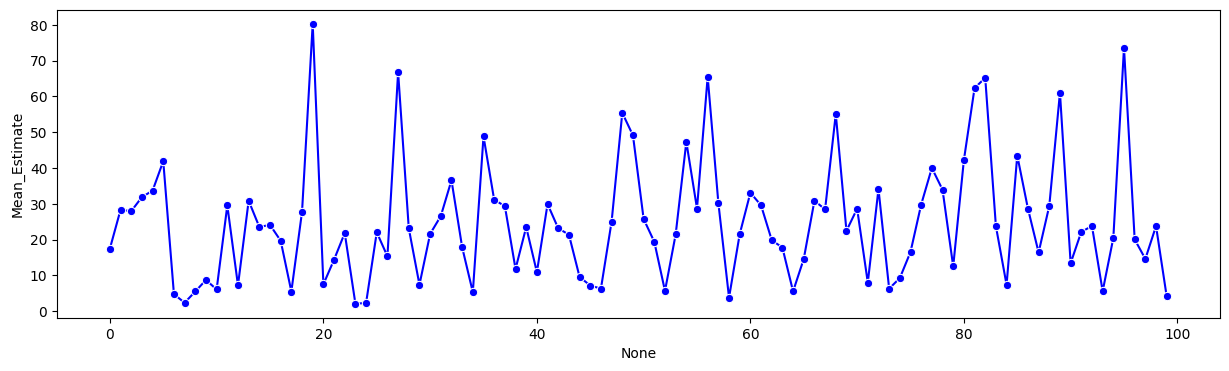

In [115]:
plt.figure(figsize =(15,4))

data1=df_obesity.head(100)

sns.lineplot(data=data1, x= data1.index, y="Mean_Estimate", marker = 'o', color='blue')
plt.show()

# using the first 100 records as sample, could see some outliers in the data of Mean_Estimates

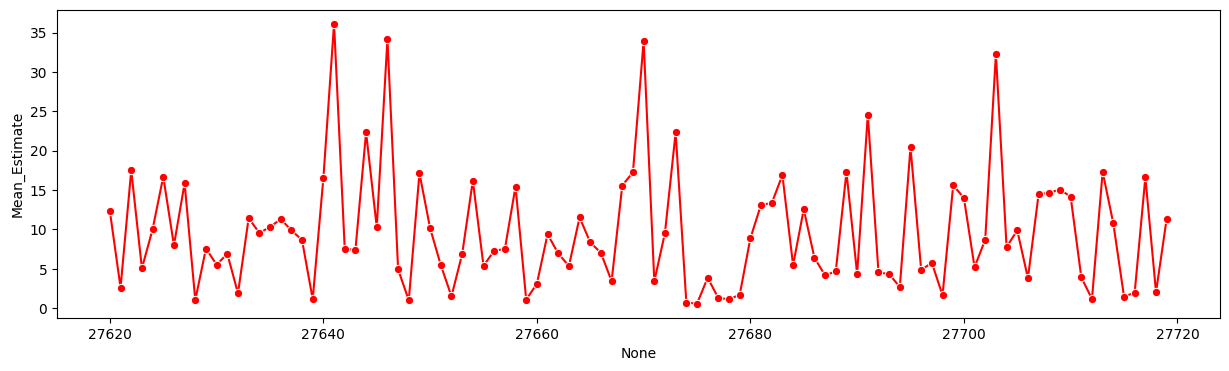

In [116]:
plt.figure(figsize =(15,4))


data2=df_obesity.tail(100)
sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='red')
plt.show()


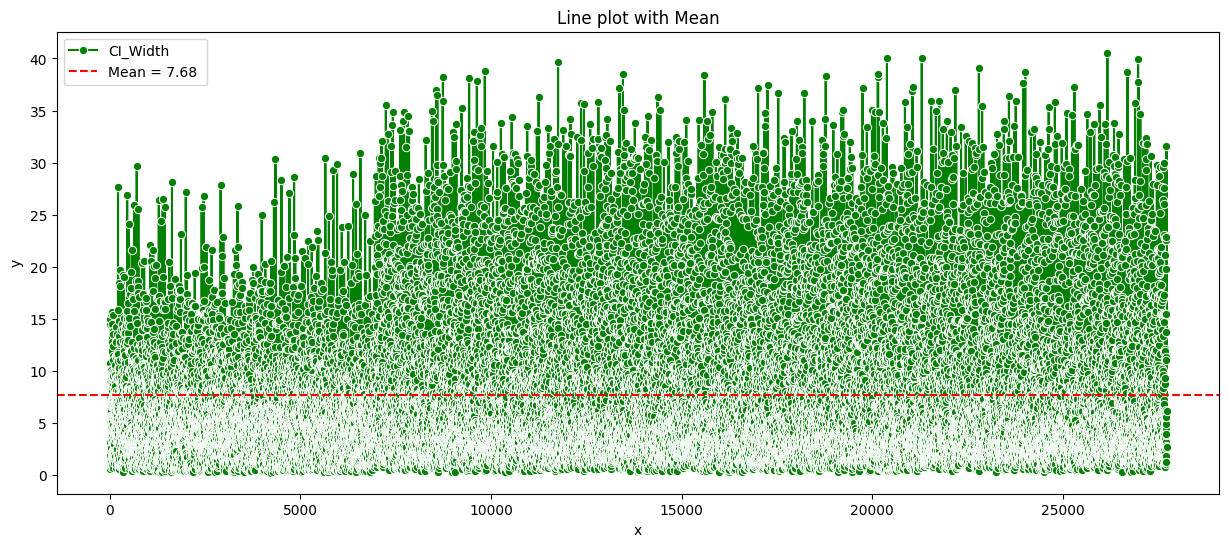

In [117]:
plt.figure(figsize=(15,6))

data1=df_obesity

sns.lineplot(data=data1, x=data1.index, y= "CI_Width", marker='o', color='green', label="CI_Width")

mean_y=data1['CI_Width'].mean()
plt.axhline(y=mean_y, color= 'red', linestyle='--', label= f'Mean = {mean_y:0.2f} ')

plt.title('Line plot with Mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [118]:
region_count=data1.groupby("Region")["Country"].nunique().reset_index()

In [119]:
region_count

,Region,Country
0,Africa,186
1,Americas,180
2,Eastern Mediterranean,142
3,Europe,193
4,South-East Asia,80
5,SpecialCase,11
6,Western Pacific,171


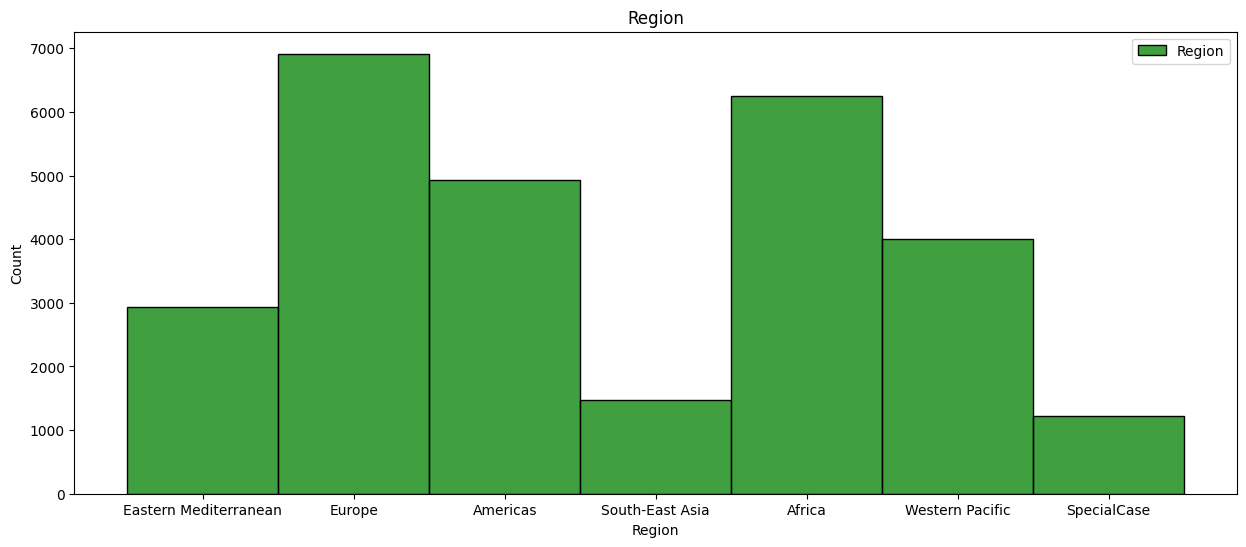

In [120]:
plt.figure(figsize=(15,6))
sns.histplot(data=data1, x="Region", label ="Region", color="green")

plt.legend()
plt.title("Region" )
plt.show()

In [121]:
st_bar = data1.groupby(["Region", "Age_Group"]).agg({
    "Country":'count'
}).reset_index().pivot_table(columns="Age_Group", index="Region", values="Country")

In [122]:
st_bar

Age_Group,Adult,Child
Region,,
Africa,1583.0,4675.0
Americas,1240.0,3687.0
Eastern Mediterranean,734.0,2198.0
Europe,1738.0,5178.0
South-East Asia,372.0,1096.0
SpecialCase,254.0,967.0
Western Pacific,1009.0,2989.0


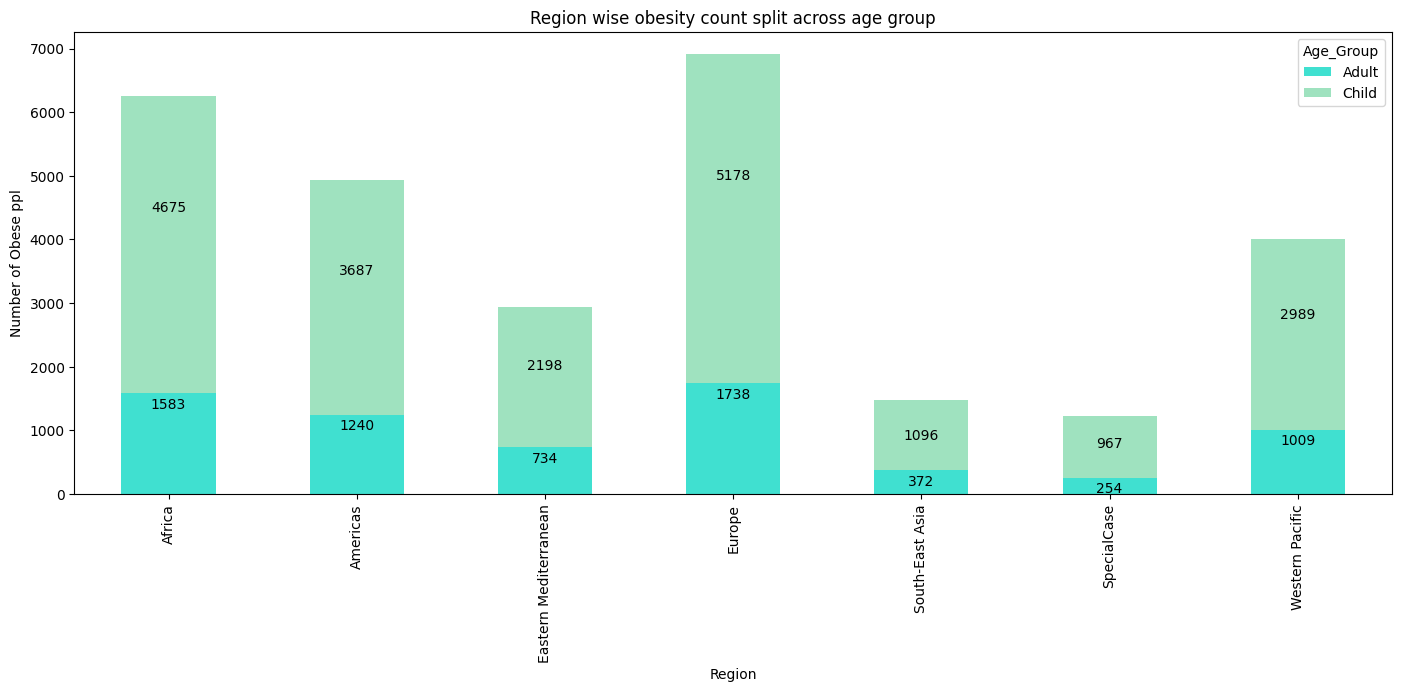

In [123]:
ax= st_bar.plot(kind="bar", stacked= True, figsize=(17,6), color = ['#40E0D0', '#9FE2BF'])

ax.set_title("Region wise obesity count split across age group")
ax.set_xlabel('Region')
ax.set_ylabel('Number of Obese ppl')
#ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    #space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, -13), textcoords="offset points", ha='center', va='bottom')

plt.show()

In [124]:
country_level_counts= data1.groupby(["Region", "Obesity_Level"])["Country"].nunique().reset_index()

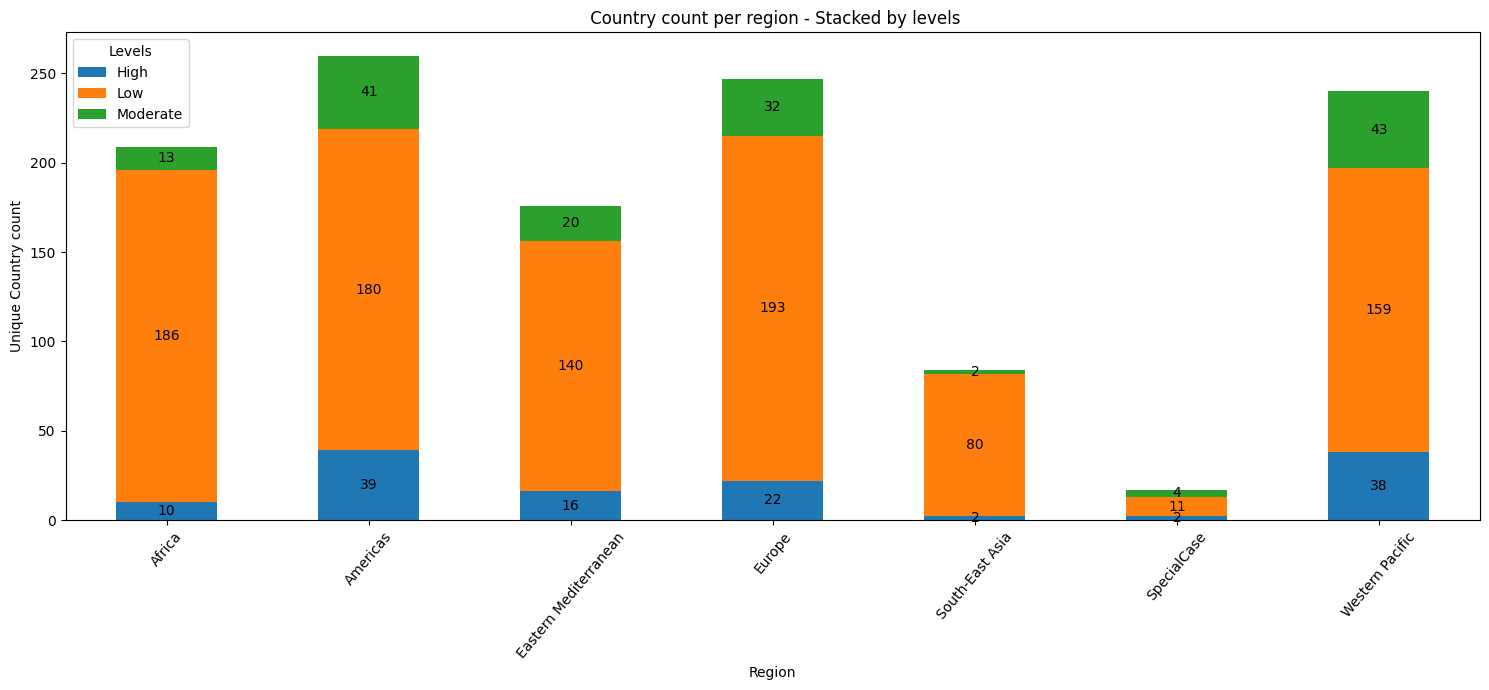

In [125]:
pivot_df= country_level_counts.pivot(index="Region", columns="Obesity_Level", values="Country").fillna(0)

ax= pivot_df.plot(kind="bar", stacked= True, figsize=(15,7))

for idx, region in enumerate(pivot_df.index):
    y_offset = 0
    for level in pivot_df.columns:
        value= pivot_df.loc[region, level]
        if value >0:
            ax.text(idx, y_offset + value /2, int(value), ha="center", va="center", fontsize = 10)
            y_offset += value
            
plt.title(" Country count per region - Stacked by levels")
plt.ylabel("Unique Country count")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.legend(title="Levels")
plt.tight_layout()
plt.show()

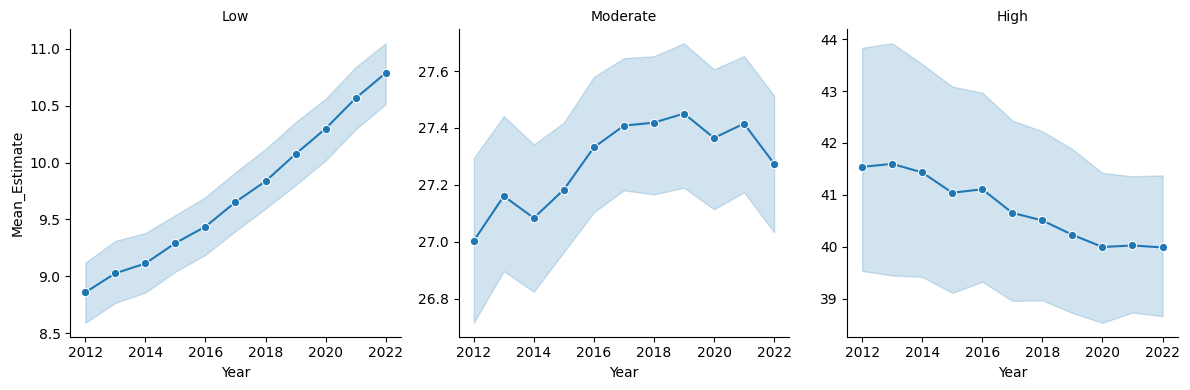

In [126]:
g=sns.FacetGrid(data1, col="Obesity_Level", col_wrap=3, height= 4, sharey= False )
g.map_dataframe(sns.lineplot, x="Year", y="Mean_Estimate", marker='o')

g.set_titles("{col_name}")
g.set_axis_labels("Year","Mean_Estimate")
plt.tight_layout()
plt.show()

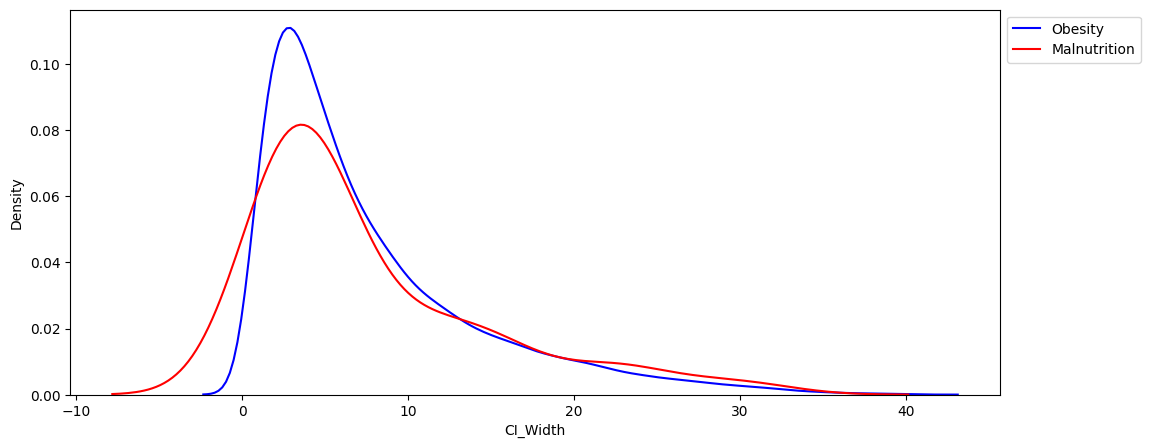

In [127]:




plt.figure(figsize= (12, 5) )
sns.kdeplot(data1['CI_Width'], color="blue")
sns.kdeplot(data2['CI_Width'], color="red")

plt.legend(labels=["Obesity", "Malnutrition"], loc=2, bbox_to_anchor=(1, 1))


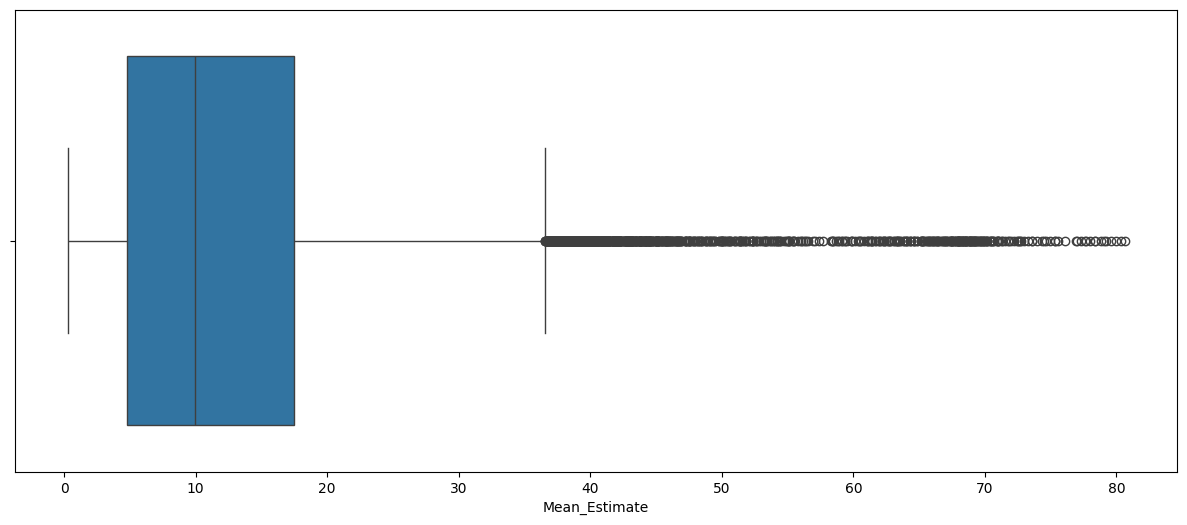

In [128]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(data=data1, x= "Mean_Estimate")

plt.show()

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\2366584667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x="Region", y="Mean_Estimate", palette="deep")


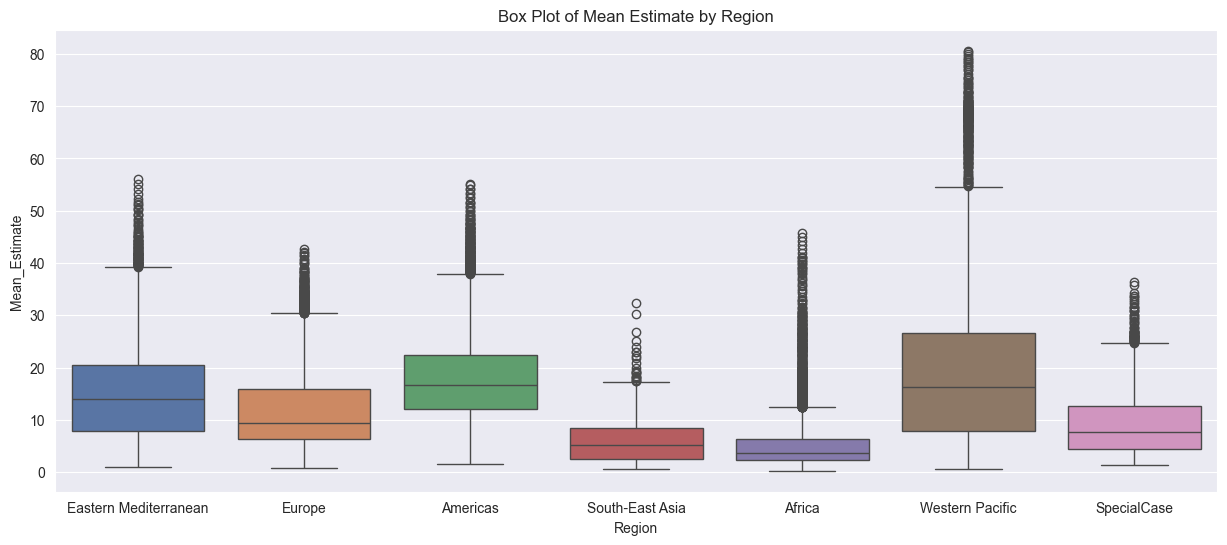

In [129]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.boxplot(data=data1, x="Region", y="Mean_Estimate", palette="deep")
plt.title("Box Plot of Mean Estimate by Region")

plt.xlabel("Region")
plt.ylabel("Mean_Estimate")

plt.show()

In [130]:
fig = px.scatter_3d(
            data_frame= data1.head(100),
            x = data1.head(100).index,
            y = "Year",
            z = "CI_Width",
            color = "Gender",
            width= 1200,
            height= 600,
            hover_data= ["Country", "Age_Group"]
)

fig.show()

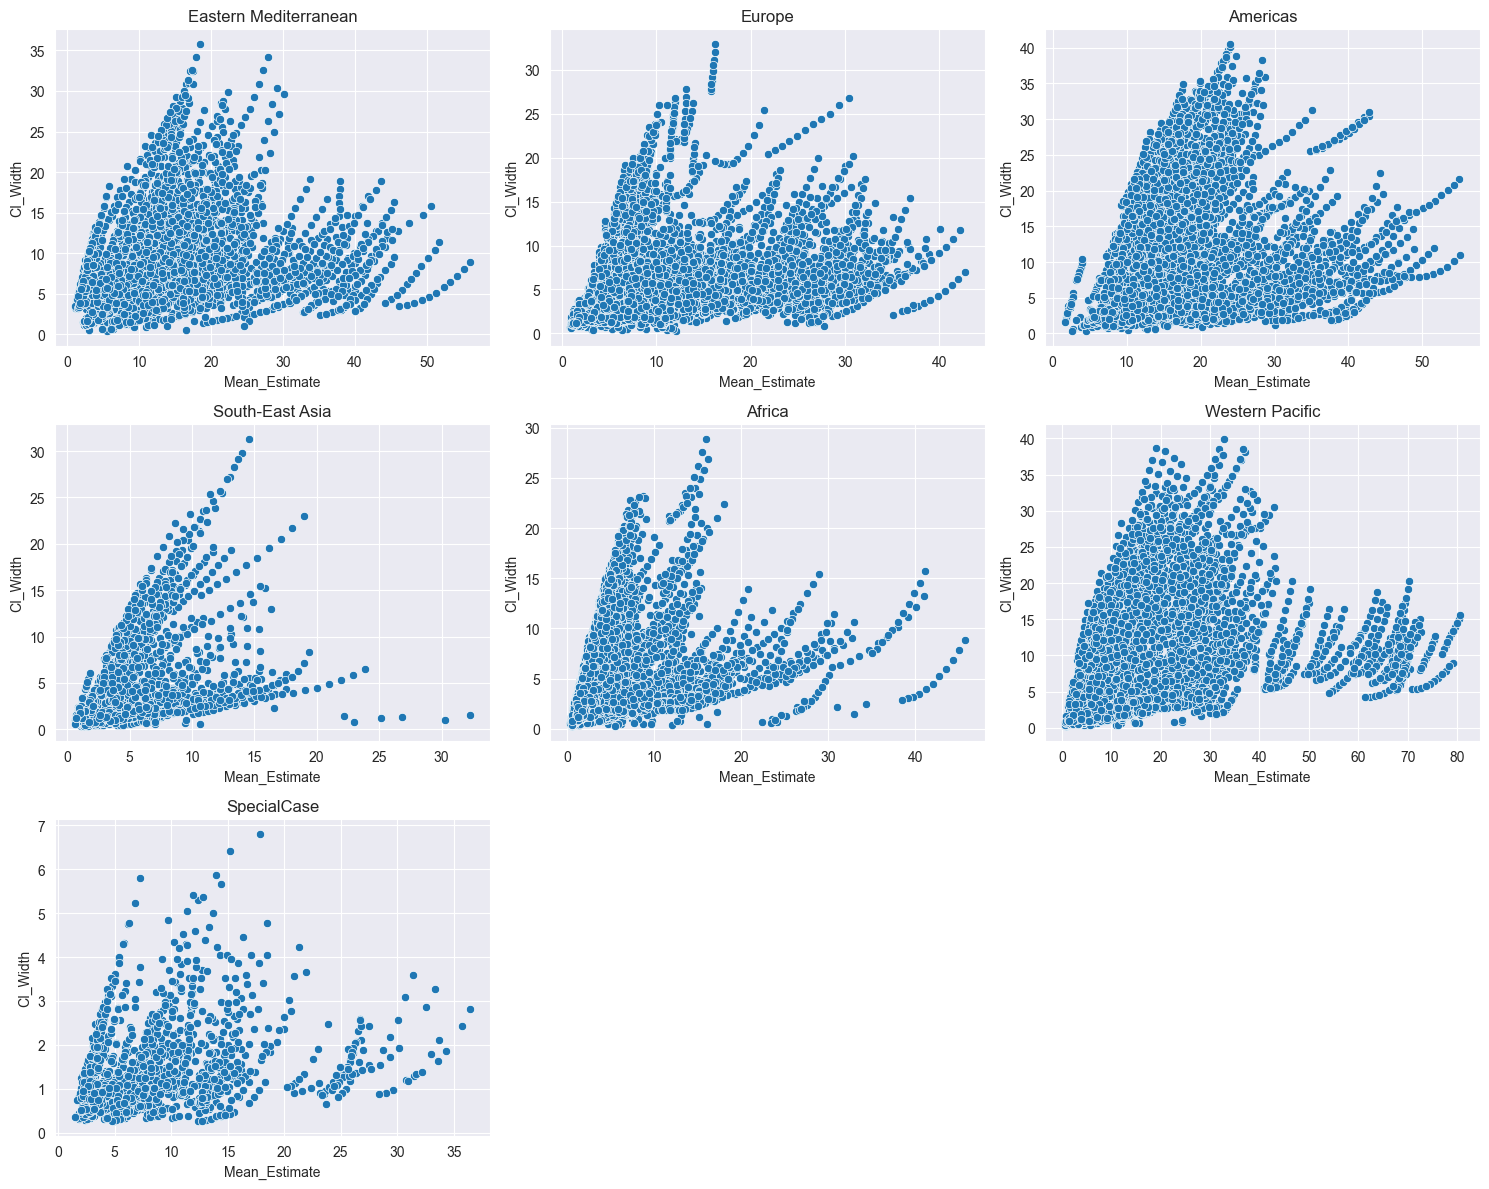

In [131]:
regions=df_obesity["Region"].unique()
n=len(regions)
cols=3
rows=(n+ cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize= (15, 4 * rows), sharex=False, sharey=False)

for i , region in enumerate(regions):
    r= i//cols
    c=i%cols
    ax=axes[r,c] if rows >1 else axes[c]
    sns.scatterplot(data= data1[data1["Region"]==region], x ="Mean_Estimate", y="CI_Width", ax=ax)
    ax.set_title(f'{region}')
    ax.set_xlabel("Mean_Estimate")
    ax.set_ylabel("CI_Width")
    
# to hide unused axes

for j in range(i+1, rows * cols):
    fig.delaxes(axes[j//cols, j%cols] if rows > 1 else axes[j % cols])
    

plt.tight_layout()
plt.show()

In [132]:
data2= df_malnutrition

In [133]:
#EDA of Malnutrition dataframe

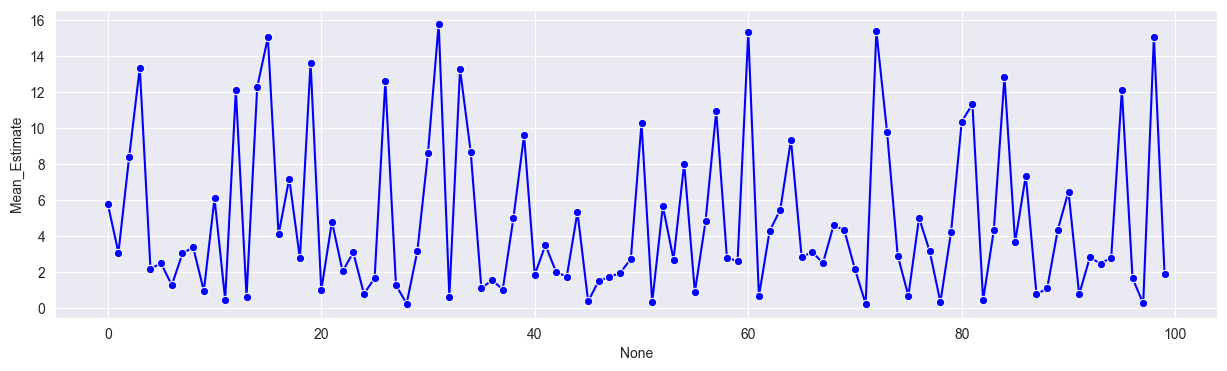

In [134]:
plt.figure(figsize =(15,4))

data2=df_malnutrition.head(100)

sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='blue')
plt.show()

# using the first 100 records as sample, could see some outliers in the data of Mean_Estimates

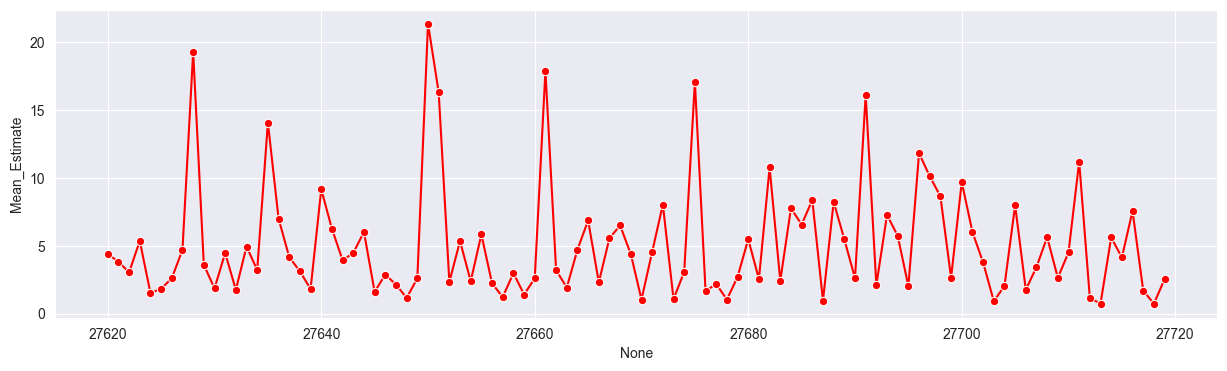

In [135]:
plt.figure(figsize =(15,4))


data2=df_malnutrition.tail(100)
sns.lineplot(data=data2, x= data2.index, y="Mean_Estimate", marker = 'o', color='red')
plt.show()


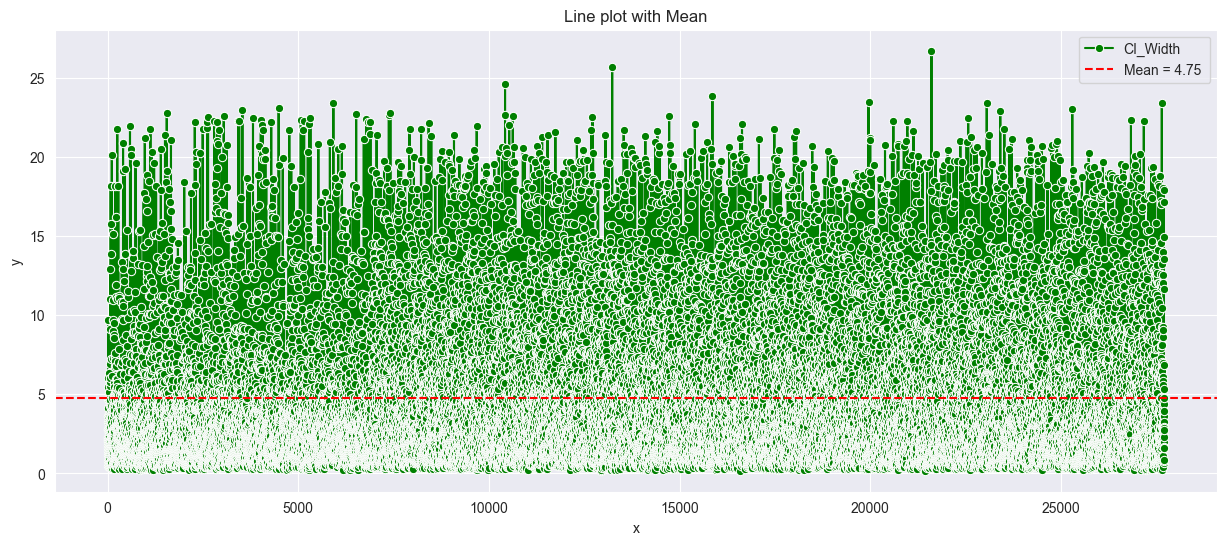

In [136]:
plt.figure(figsize=(15,6))

data2=df_malnutrition

sns.lineplot(data=data2, x=data2.index, y= "CI_Width", marker='o', color='green', label="CI_Width")

mean_y=data2['CI_Width'].mean()
plt.axhline(y=mean_y, color= 'red', linestyle='--', label= f'Mean = {mean_y:0.2f} ')

plt.title('Line plot with Mean')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [137]:
region_count1=data2.groupby("Region")["Country"].nunique().reset_index()

In [138]:
region_count1

,Region,Country
0,Africa,194
1,Americas,172
2,Eastern Mediterranean,139
3,Europe,187
4,South-East Asia,93
5,SpecialCase,11
6,Western Pacific,169


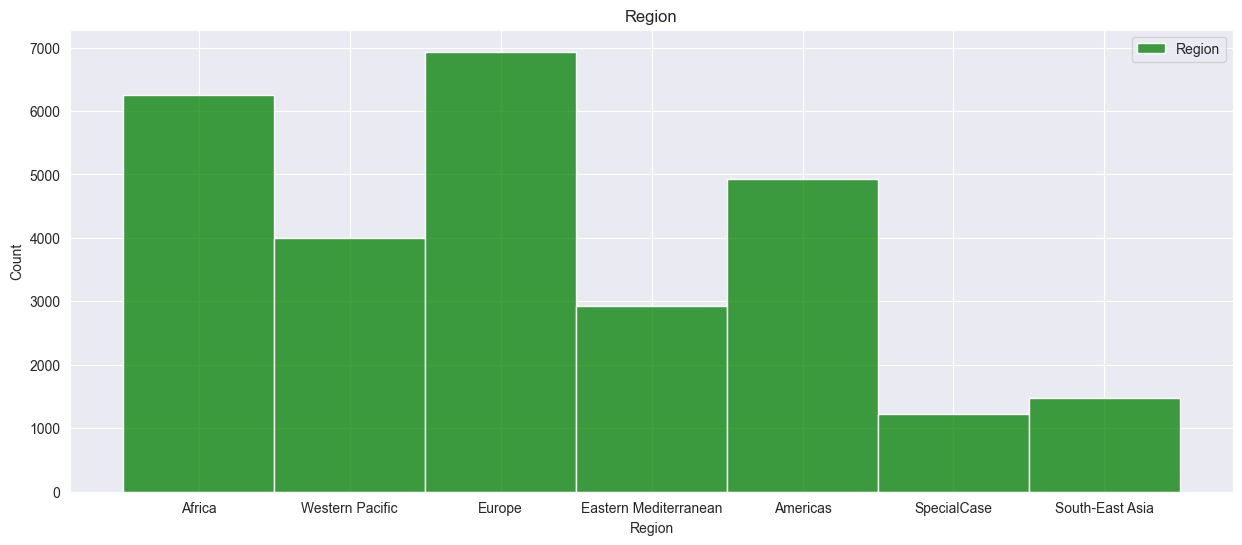

In [139]:
plt.figure(figsize=(15,6))
sns.histplot(data=data2, x="Region", label ="Region", color="green")

plt.legend()
plt.title("Region" )
plt.show()

In [140]:
st_bar1 = data2.groupby(["Region", "Age_Group"]).agg({
    "Country":'count'
}).reset_index().pivot_table(columns="Age_Group", index="Region", values="Country")

In [141]:
st_bar1

Age_Group,Adult,Child
Region,,
Africa,1574.0,4673.0
Americas,1243.0,3685.0
Eastern Mediterranean,736.0,2190.0
Europe,1752.0,5183.0
South-East Asia,370.0,1100.0
SpecialCase,248.0,971.0
Western Pacific,1007.0,2988.0


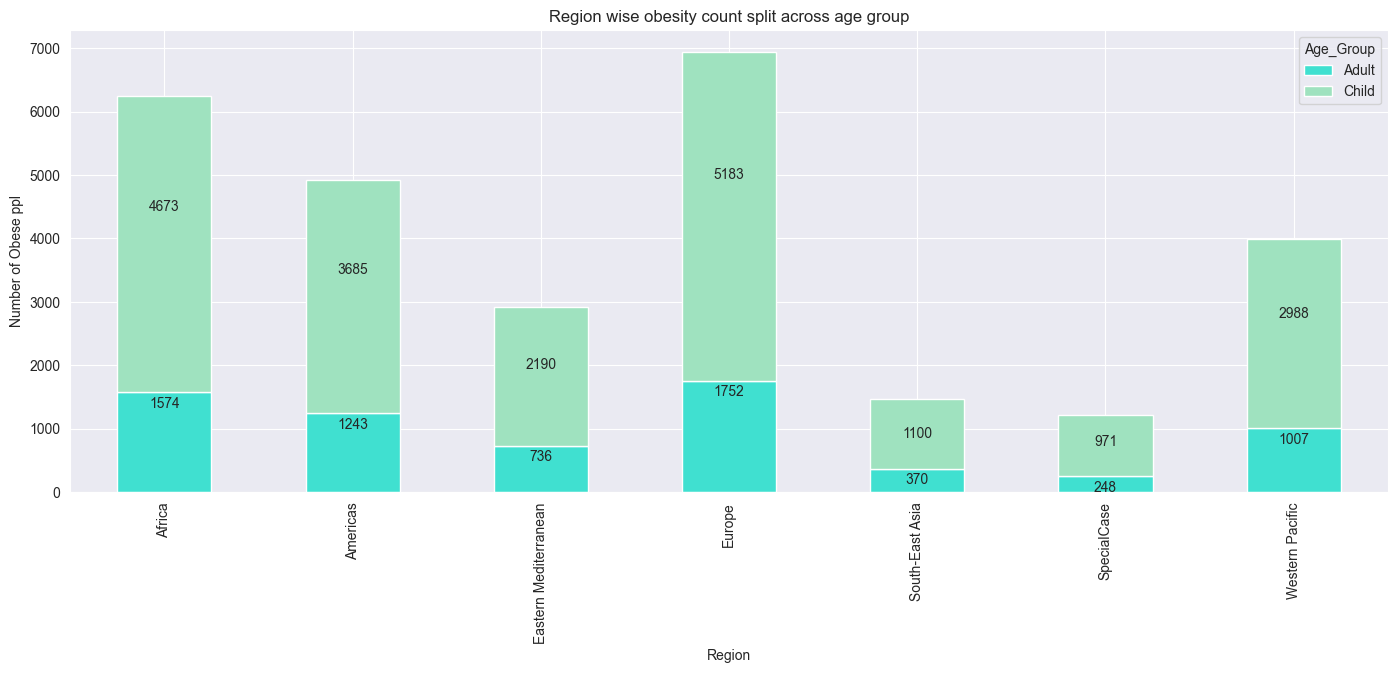

In [142]:
ax= st_bar1.plot(kind="bar", stacked= True, figsize=(17,6), color = ['#40E0D0', '#9FE2BF'])

ax.set_title("Region wise obesity count split across age group")
ax.set_xlabel('Region')
ax.set_ylabel('Number of Obese ppl')
#ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    #space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, -13), textcoords="offset points", ha='center', va='bottom')

plt.show()

In [143]:
country_level_counts1= data2.groupby(["Region", "Malnutrition_Level"])["Country"].nunique().reset_index()

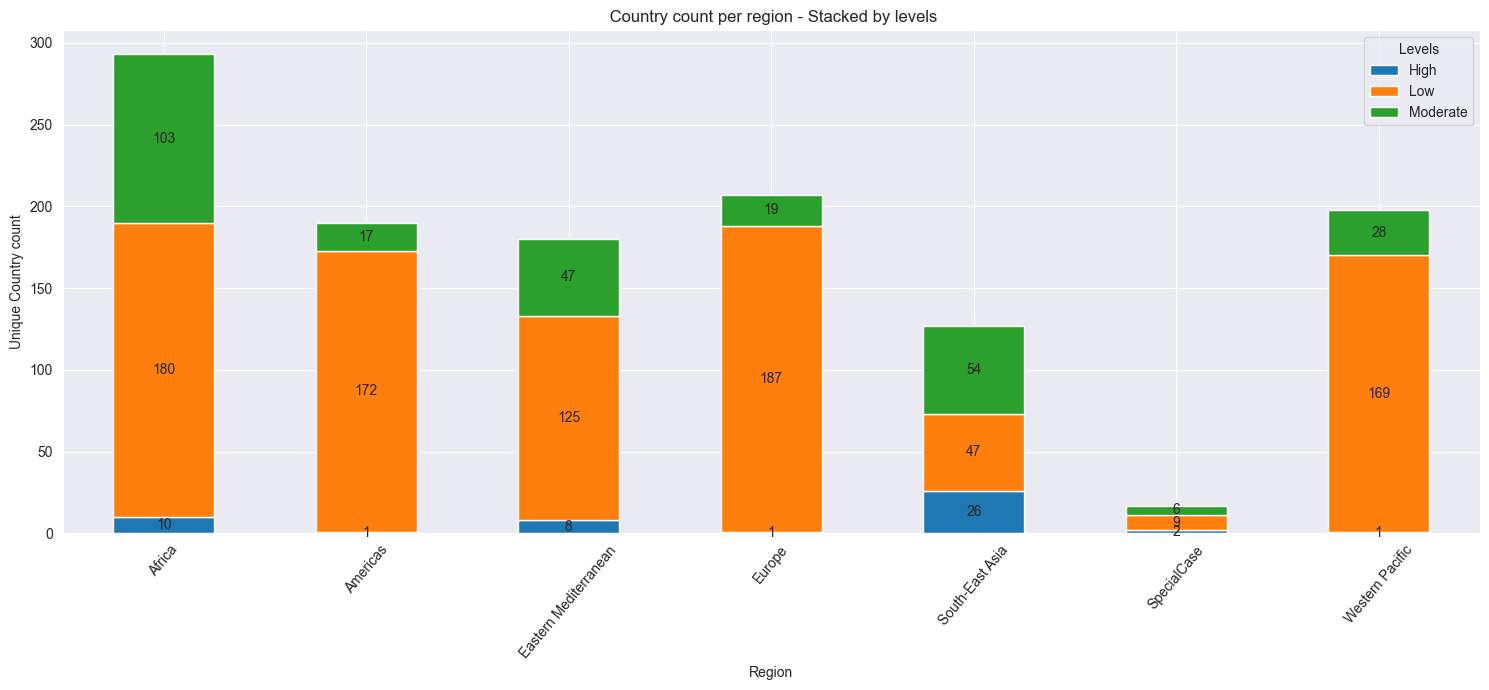

In [144]:
pivot_df= country_level_counts1.pivot(index="Region", columns="Malnutrition_Level", values="Country").fillna(0)

ax= pivot_df.plot(kind="bar", stacked= True, figsize=(15,7))

for idx, region in enumerate(pivot_df.index):
    y_offset = 0
    for level in pivot_df.columns:
        value= pivot_df.loc[region, level]
        if value >0:
            ax.text(idx, y_offset + value /2, int(value), ha="center", va="center", fontsize = 10)
            y_offset += value
            
plt.title(" Country count per region - Stacked by levels")
plt.ylabel("Unique Country count")
plt.xlabel("Region")
plt.xticks(rotation=50)
plt.legend(title="Levels")
plt.tight_layout()
plt.show()

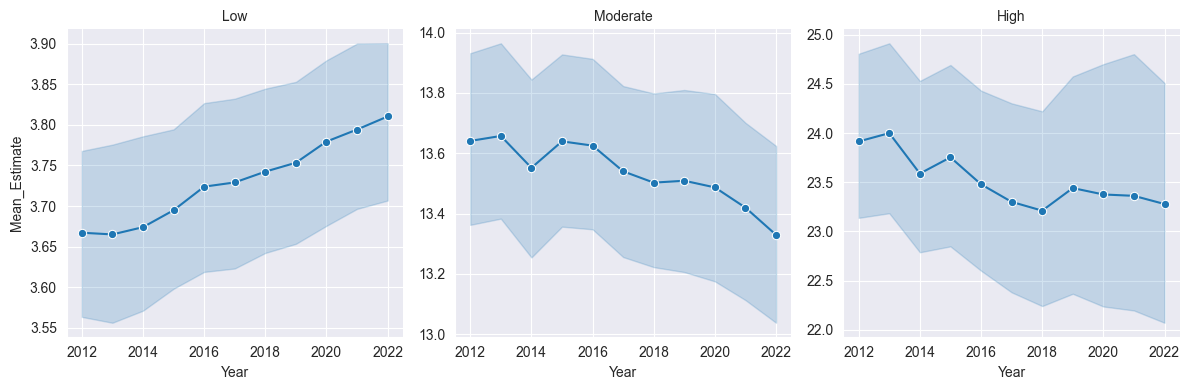

In [145]:
g1=sns.FacetGrid(data2, col="Malnutrition_Level", col_wrap=3, height= 4, sharey= False )
g1.map_dataframe(sns.lineplot, x="Year", y="Mean_Estimate", marker='o')

g1.set_titles("{col_name}")
g1.set_axis_labels("Year","Mean_Estimate")
plt.tight_layout()
plt.show()

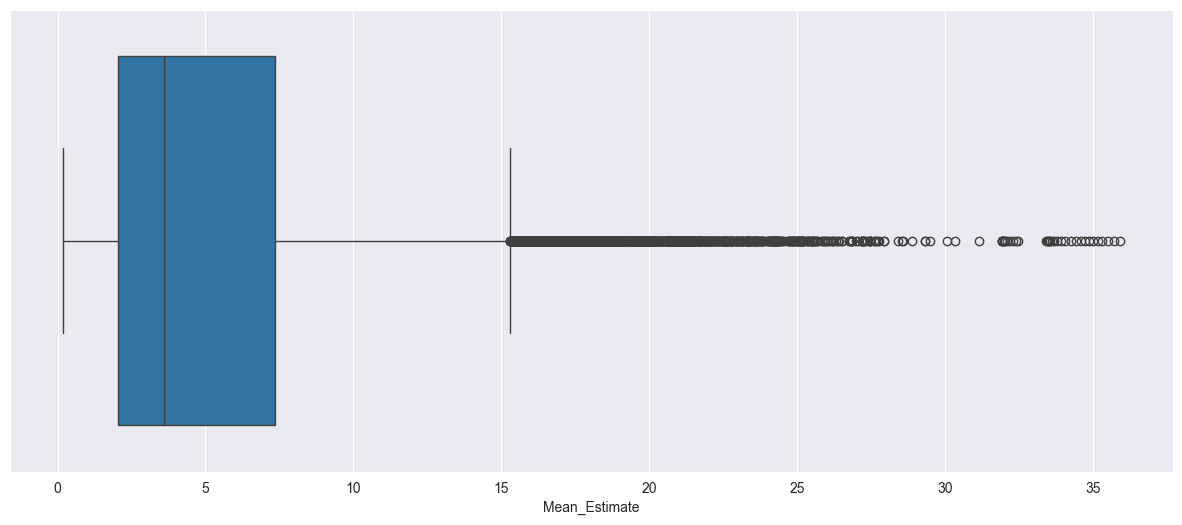

In [146]:
fig, ax = plt.subplots(figsize = (15,6))

sns.boxplot(data=data2, x= "Mean_Estimate")

plt.show()

C:\Users\Aartthi\AppData\Local\Temp\ipykernel_29028\2737837673.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




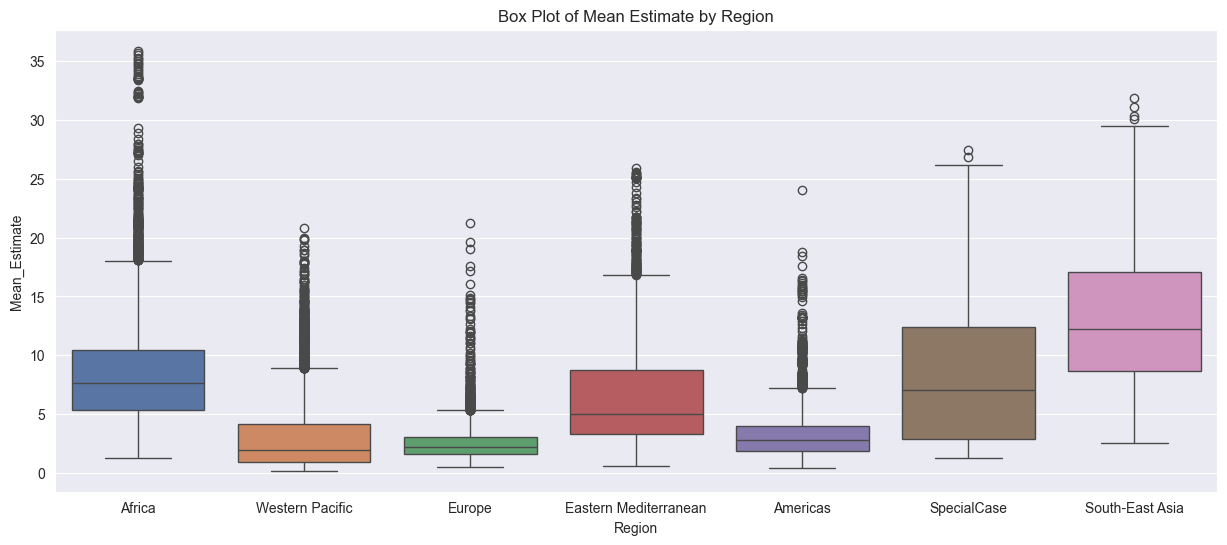

In [147]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.boxplot(data=data2, x="Region", y="Mean_Estimate", palette="deep")
plt.title("Box Plot of Mean Estimate by Region")

plt.xlabel("Region")
plt.ylabel("Mean_Estimate")

plt.show()

In [148]:
fig = px.scatter_3d(
            data_frame= data2.head(100),
            x = data2.head(100).index,
            y = "Year",
            z = "CI_Width",
            color = "Gender",
            width= 1200,
            height= 600,
            hover_data= ["Country", "Age_Group"]
)

fig.show()

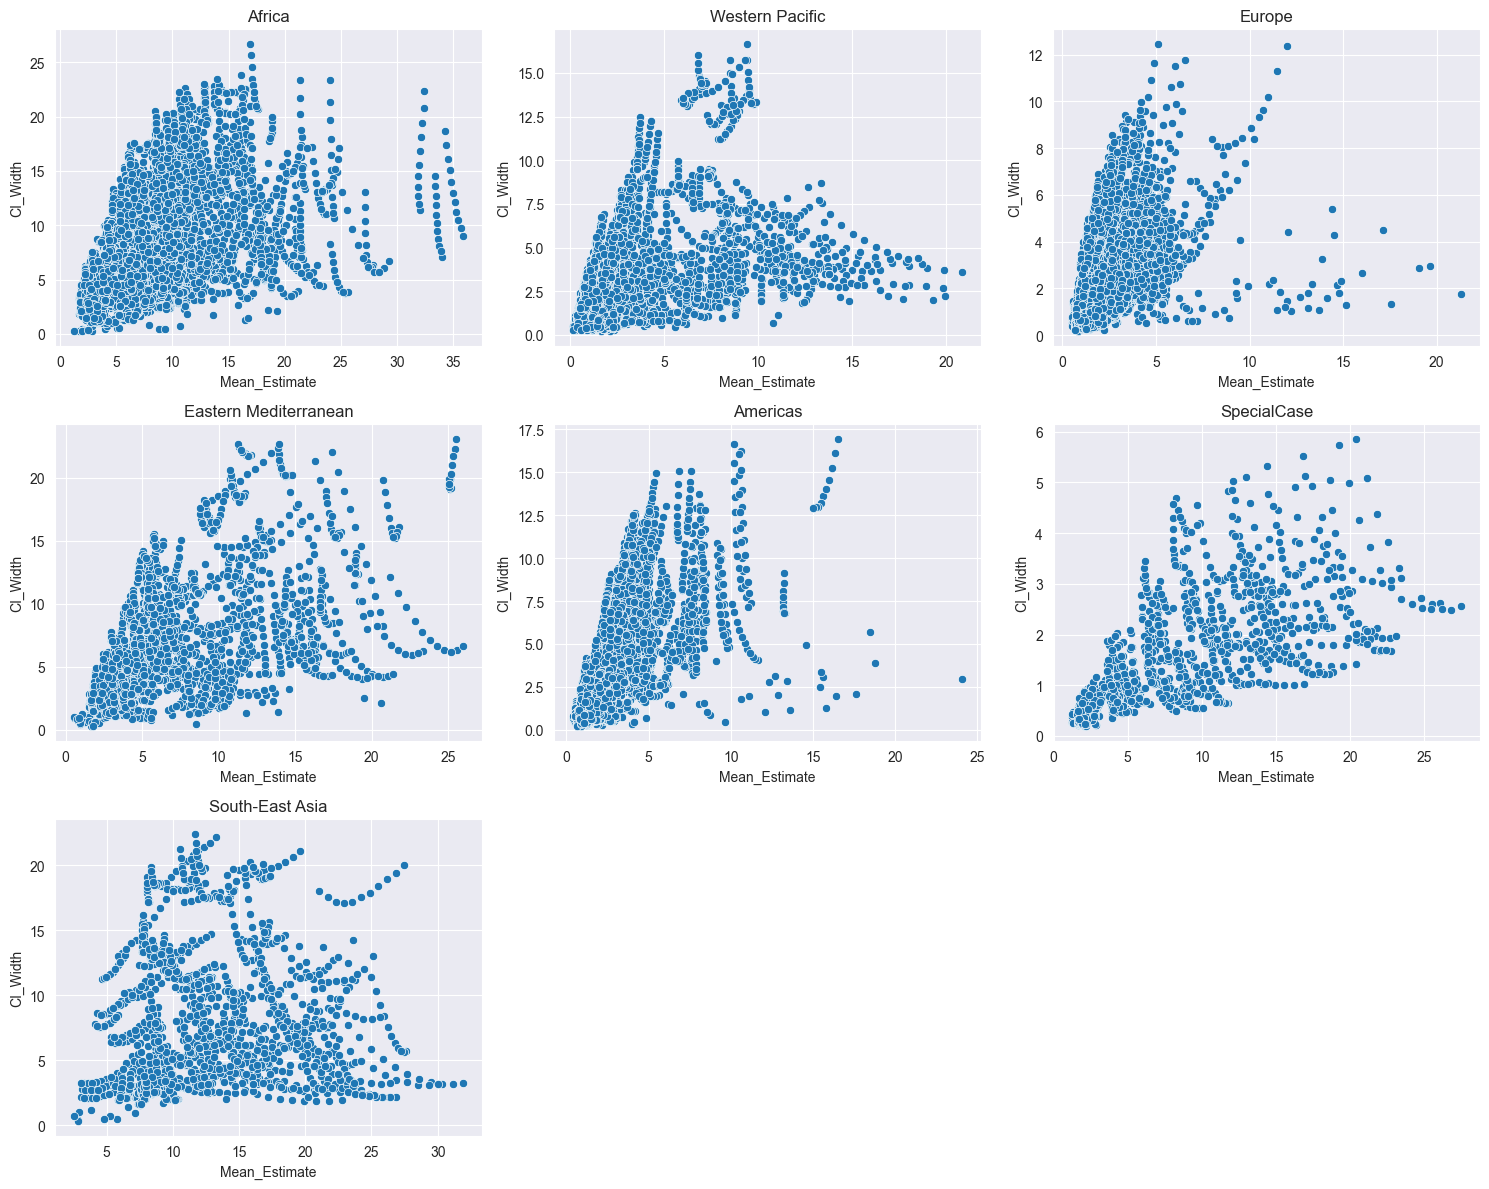

In [149]:
regions1=df_malnutrition["Region"].unique()
n=len(regions1)
cols=3
rows=(n+ cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize= (15, 4 * rows), sharex=False, sharey=False)

for i , region in enumerate(regions1):
    r= i//cols
    c=i%cols
    ax=axes[r,c] if rows >1 else axes[c]
    sns.scatterplot(data= data2[data2["Region"]==region], x ="Mean_Estimate", y="CI_Width", ax=ax)
    ax.set_title(f'{region}')
    ax.set_xlabel("Mean_Estimate")
    ax.set_ylabel("CI_Width")
    
# to hide unused axes

for j in range(i+1, rows * cols):
    fig.delaxes(axes[j//cols, j%cols] if rows > 1 else axes[j % cols])
    

plt.tight_layout()
plt.show()

# DB & PYTHON CONNECTION

In [150]:
!pip install mysql-connector



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
connection=db.connect(
    host="localhost",
    user="Nutri",
    password="12345678",
    database="nutrition",
    auth_plugin='mysql_native_password'
)


curr=connection.cursor()

In [152]:
connection

In [153]:
#curr.close()
#connection.close()

In [154]:
!pip install pymysql


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# insertion of data into SQL

In [155]:
df_obesity['Region']= df_obesity['Region'].astype('string')
df_obesity['Gender']= df_obesity['Gender'].astype('string')
df_obesity['Country']= df_obesity['Country'].astype('string')
df_obesity['Age_Group']= df_obesity['Age_Group'].astype('string')
df_obesity['Obesity_Level']= df_obesity['Obesity_Level'].astype('string')

In [156]:
# table creation (Obesity, Malnutrition)


In [157]:
curr.execute(""" 

    create table Malnutrition(
                    Region varchar(100),
                    Gender varchar(100),
                    Year int,
                    LowerBound float,
                    UpperBound float,
                    Mean_Estimate float,
                    Country varchar(100),
                    Age_Group varchar(100),
                    CI_Width float,
                    Malnutrition_Level varchar(100)
          )
          
          
""")

In [158]:
curr.execute(""" 

    create table Obesity(
                    Region varchar(100),
                    Gender varchar(100),
                    Year int,
                    LowerBound float,
                    UpperBound float,
                    Mean_Estimate float,
                    Country varchar(100),
                    Age_Group varchar(100),
                    CI_Width float,
                    Obesity_Level varchar(100)
          )
          
          
""")

In [159]:
import pymysql

host="localhost"
username="Nutri"
password="12345678"
database="nutrition"
port=3306

conn = pymysql.connect(host=host, port=port, user= username, passwd= password, db=database)

cursor= conn.cursor()

for index, row in df_obesity.iterrows():
    sql= """
    INSERT INTO Obesity (Region,Gender, Year, LowerBound, UpperBound, Mean_Estimate, Country, Age_Group, CI_Width, Obesity_Level)    
    VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    
    values = (row['Region'], row['Gender'], row['Year'], row['LowerBound'], row['UpperBound'], row['Mean_Estimate'], 
              row['Country'], row['Age_Group'], row['CI_Width'], row['Obesity_Level'] )
    cursor.execute(sql, values)
    
conn.commit()
#conn.close()



In [160]:
for index, row in df_malnutrition.iterrows():
    sql= """
    INSERT INTO Malnutrition (Region,Gender, Year, LowerBound, UpperBound, Mean_Estimate, Country, Age_Group, CI_Width, Malnutrition_Level)    
    VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    
    values = (row['Region'], row['Gender'], row['Year'], row['LowerBound'], row['UpperBound'], row['Mean_Estimate'], 
              row['Country'], row['Age_Group'], row['CI_Width'], row['Malnutrition_Level'] )
    cursor.execute(sql, values)
    
conn.commit()